In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [27]:
rng = np.random.default_rng()
def generate_data(num_pred, num_obs):
    X = rng.standard_normal(size=(num_obs, num_pred))
    y = np.dot(X, rng.standard_normal(size=num_pred)) + rng.normal(loc=0, scale=2, size=num_obs)
    return X, y

def calculate_R_squared(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return r2_score(y, model.predict(X))

def calculate_adjusted_R_squared(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return 1 - ((1 - r2_score(y, model.predict(X))) * (len(y) - 1)) / (len(y) - X.shape[1] - 1)

R squared =  0.20522394213095574
R squared adjusted =  0.1971139823567819


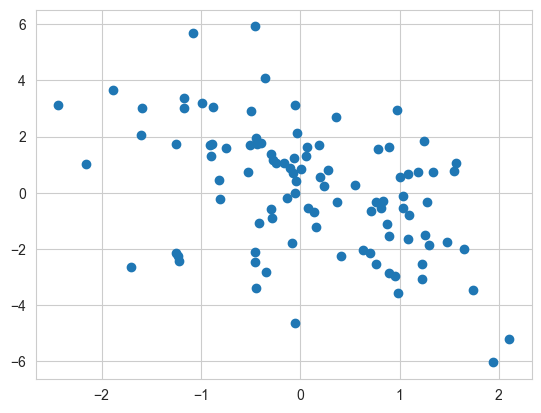

In [28]:
X, y = generate_data(1, 100)
plt.scatter(X, y)
print('R squared = ', calculate_R_squared(X, y))
print('R squared adjusted = ', calculate_adjusted_R_squared(X, y))

R squared =  0.1106961999146564
R squared adjusted =  0.10711751259036928


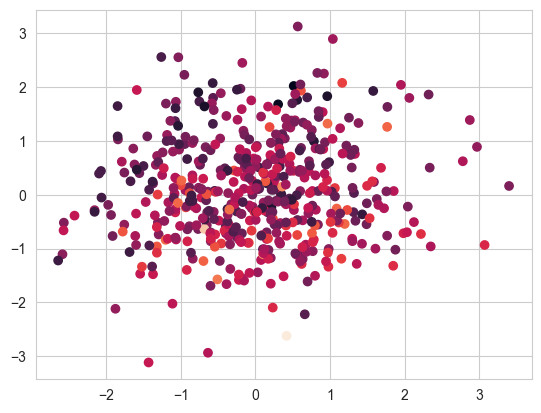

In [29]:
X, y = generate_data(2, 500)
plt.scatter(X[:,0], X[:,1], c=y)
print('R squared = ', calculate_R_squared(X, y))
print('R squared adjusted = ', calculate_adjusted_R_squared(X, y))

In [30]:
num_simulations = 100
results = []
for num_predictors in range(1, 50, 2):
    print(num_predictors)
    #for num_observations in range(5, 20, 5):
    R_squared = []
    for _ in range(num_simulations):
        X, y = generate_data(num_predictors, 200)
        R_squared.append(calculate_R_squared(X, y))
    results.append((num_predictors, 10, np.mean(R_squared)))

results

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49


[(1, 10, 0.18756866319850934),
 (3, 10, 0.36438640003284506),
 (5, 10, 0.5336439009666051),
 (7, 10, 0.6001551993091582),
 (9, 10, 0.6809427637651864),
 (11, 10, 0.7162577688351967),
 (13, 10, 0.7509978741470809),
 (15, 10, 0.78131736001378),
 (17, 10, 0.8130268225747821),
 (19, 10, 0.8367123693890467),
 (21, 10, 0.8464483145658518),
 (23, 10, 0.859828119828112),
 (25, 10, 0.872227082108176),
 (27, 10, 0.8756787938022257),
 (29, 10, 0.8936693133745357),
 (31, 10, 0.8978186642539999),
 (33, 10, 0.9018032543905607),
 (35, 10, 0.9088609427513734),
 (37, 10, 0.9178347898835699),
 (39, 10, 0.920926367848595),
 (41, 10, 0.9268256271642329),
 (43, 10, 0.9295414513738244),
 (45, 10, 0.9341449892096675),
 (47, 10, 0.9394132885697762),
 (49, 10, 0.9390060273867837)]

Text(0, 0.5, 'Number of observations')

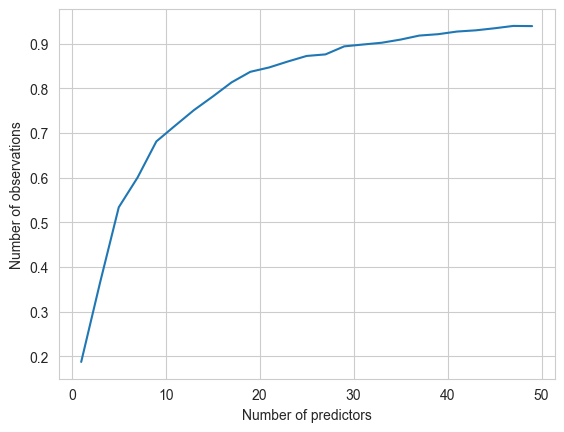

In [31]:
num_predictors = [res[0] for res in results]
num_observations = [res[1] for res in results]
R_squared = [res[2] for res in results]

plt.plot(num_predictors, R_squared)
plt.xlabel('Number of predictors')
plt.ylabel('Number of observations')